In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from model.model import SegModel
from model.pytorch_model import PytorchModel

import torch
from nets.U_net_simple import UNet
from nets.SegNet import SegNet 

from torch.utils.data import DataLoader 
from dataset.dataset import SegData
from dataset.pytorch_dataset import PytData

import numpy as np

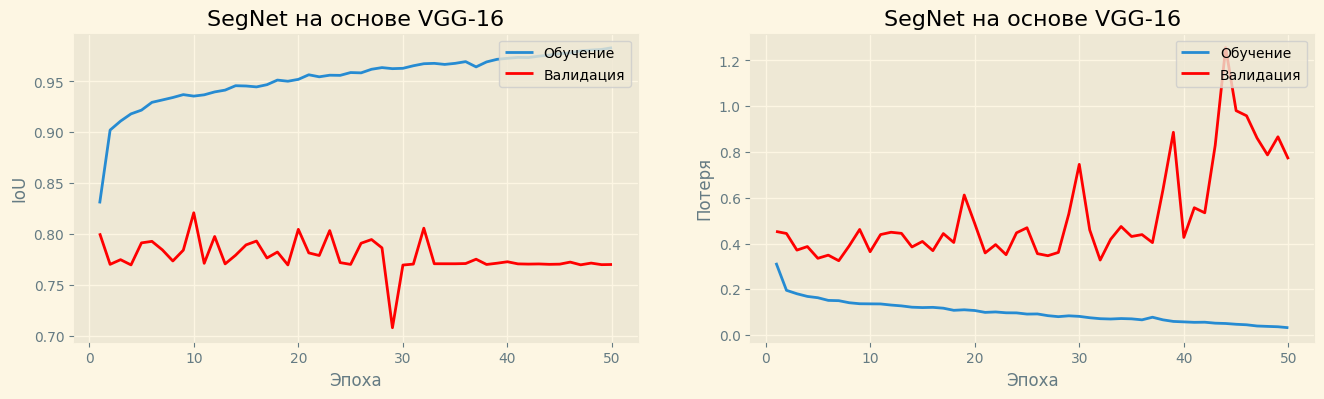

In [59]:
df = pd.read_csv('logs/SegNet/vgg11/version_0/metrics.csv')
Accuracy_train_epoch = df.Accuracy_train_epoch.dropna()[:50]
Accuracy_valid_epoch = df.Accuracy_valid_epoch.dropna()[:50]
Loss_train_epoch = df.Loss_train_epoch.dropna()[:50]
Loss_valid_epoch = df.Loss_valid_epoch.dropna()[:50]

plt.style.use('Solarize_Light2')
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(list(range(1,51)), Accuracy_train_epoch, label='Обучение')
axs[0].plot(list(range(1,51)), Accuracy_valid_epoch, label='Валидация', c = 'red')
axs[0].set_xlabel('Эпоха')
axs[0].set_ylabel('IoU')
axs[0].set_title('SegNet на основе VGG-16')
axs[0].legend(loc='upper right')
axs[1].plot(list(range(1,51)), Loss_train_epoch, label='Обучение')
axs[1].plot(list(range(1,51)), Loss_valid_epoch, label='Валидация', c = 'red')
axs[1].set_xlabel('Эпоха')
axs[1].set_ylabel('Потеря')
axs[1].set_title('SegNet на основе VGG-16')
axs[1].legend(loc='upper right')
plt.savefig('results/SegNet_metrics.jpg')
plt.show()

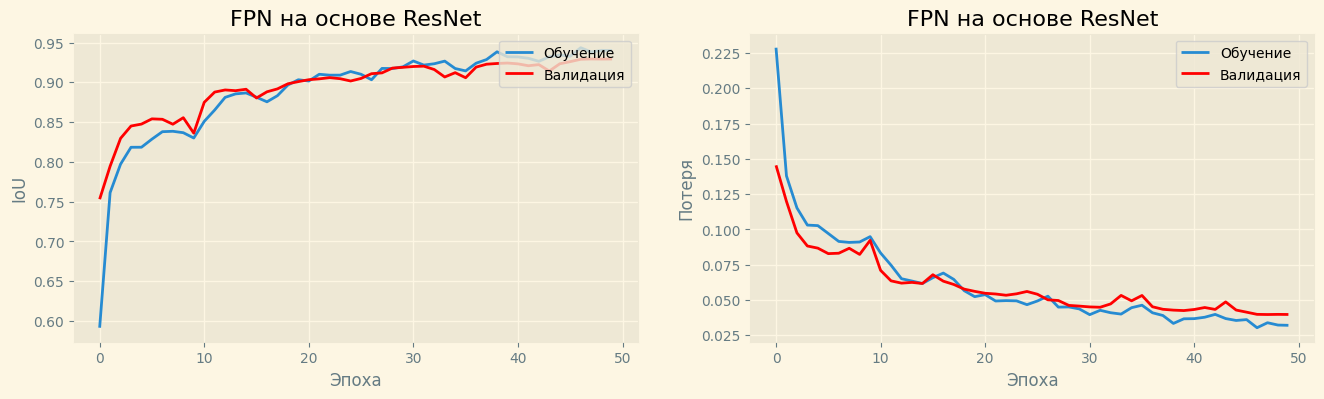

In [60]:
df = pd.read_csv('logs/FPN/resnet34/version_0/metrics.csv')
Accuracy_train_epoch = df.train_dataset_iou.dropna()[:50]
Accuracy_valid_epoch = df.valid_dataset_iou.dropna()[:50]
Loss_train_epoch = df.Loss_train_epoch.dropna()[:50]
Loss_valid_epoch = df.Loss_valid_epoch.dropna()[:50]

plt.style.use('Solarize_Light2')
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(list(range(len(Accuracy_train_epoch))), Accuracy_train_epoch, label='Обучение')
axs[0].plot(list(range(len(Accuracy_train_epoch))), Accuracy_valid_epoch, label='Валидация', c = 'red')
axs[0].set_xlabel('Эпоха')
axs[0].set_ylabel('IoU')
axs[0].set_title('FPN на основе ResNet')
axs[0].legend(loc='upper right')
axs[1].plot(list(range(len(Loss_train_epoch))), Loss_train_epoch, label='Обучение')
axs[1].plot(list(range(len(Loss_train_epoch))), Loss_valid_epoch, label='Валидация', c = 'red')
axs[1].set_xlabel('Эпоха')
axs[1].set_ylabel('Потеря')
axs[1].set_title('FPN на основе ResNet')
axs[1].legend(loc='upper right')
plt.savefig('results/FPN_metrics.jpg')
plt.show()

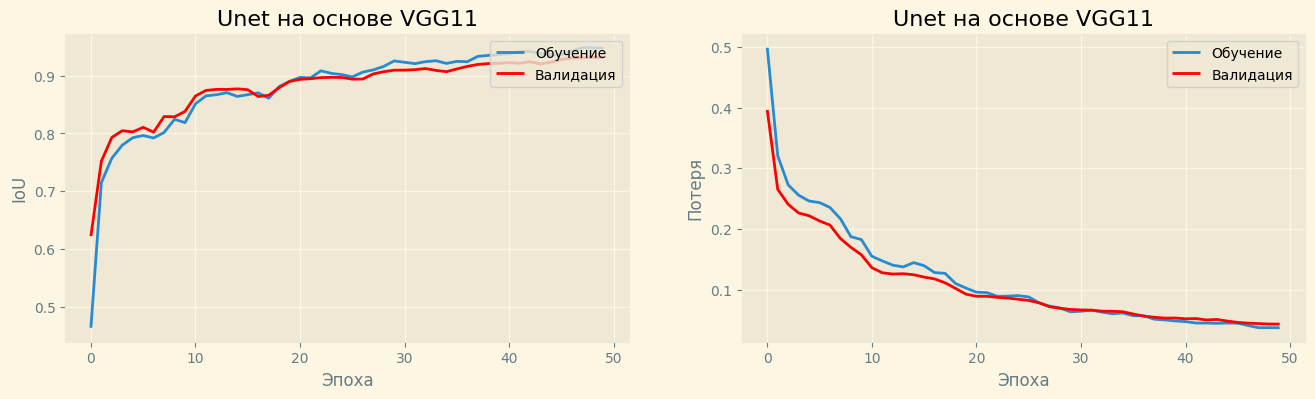

In [61]:
df = pd.read_csv('logs/Linknet/vgg11/version_0/metrics.csv')
Accuracy_train_epoch = df.train_dataset_iou.dropna()[:50]
Accuracy_valid_epoch = df.valid_dataset_iou.dropna()[:50]
Loss_train_epoch = df.Loss_train_epoch.dropna()[:50]
Loss_valid_epoch = df.Loss_valid_epoch.dropna()[:50]

plt.style.use('Solarize_Light2')
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(list(range(len(Accuracy_train_epoch))), Accuracy_train_epoch, label='Обучение')
axs[0].plot(list(range(len(Accuracy_train_epoch))), Accuracy_valid_epoch, label='Валидация', c = 'red')
axs[0].set_xlabel('Эпоха')
axs[0].set_ylabel('IoU')
axs[0].set_title('Unet на основе VGG11')
axs[0].legend(loc='upper right')
axs[1].plot(list(range(len(Loss_train_epoch))), Loss_train_epoch, label='Обучение')
axs[1].plot(list(range(len(Loss_train_epoch))), Loss_valid_epoch, label='Валидация', c = 'red')
axs[1].set_xlabel('Эпоха')
axs[1].set_ylabel('Потеря')
axs[1].set_title('Unet на основе VGG11')
axs[1].legend(loc='upper right')
plt.savefig('results/Unet_metrics.jpg')
plt.show()

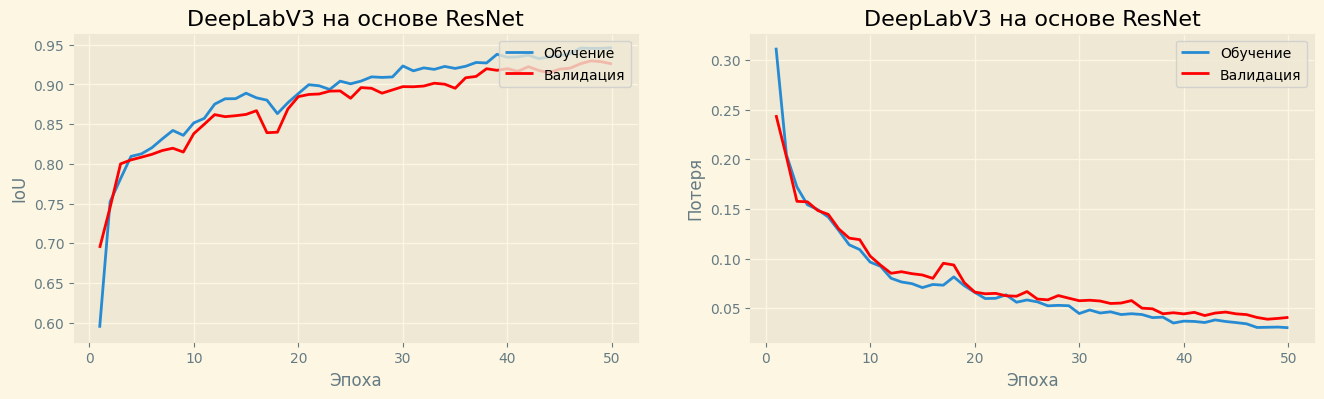

In [63]:
df = pd.read_csv('logs/DeepLabV3/resnet34/version_0/metrics.csv')
Accuracy_train_epoch = df.train_dataset_iou.dropna()[:50]
Accuracy_valid_epoch = df.valid_dataset_iou.dropna()[:50]
Loss_train_epoch = df.Loss_train_epoch.dropna()[:50]
Loss_valid_epoch = df.Loss_valid_epoch.dropna()[:50]

plt.style.use('Solarize_Light2')
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(list(range(1,51)), Accuracy_train_epoch, label='Обучение')
axs[0].plot(list(range(1,51)), Accuracy_valid_epoch, label='Валидация', c = 'red')
axs[0].set_xlabel('Эпоха')
axs[0].set_ylabel('IoU')
axs[0].set_title('DeepLabV3 на основе ResNet')
axs[0].legend(loc='upper right')
axs[1].plot(list(range(1,51)), Loss_train_epoch, label='Обучение')
axs[1].plot(list(range(1,51)), Loss_valid_epoch, label='Валидация', c = 'red')
axs[1].set_xlabel('Эпоха')
axs[1].set_ylabel('Потеря')
axs[1].set_title('DeepLabV3 на основе ResNet')
axs[1].legend(loc='upper right')
plt.savefig('results/DeepLabV3_metrics.jpg')
plt.show()

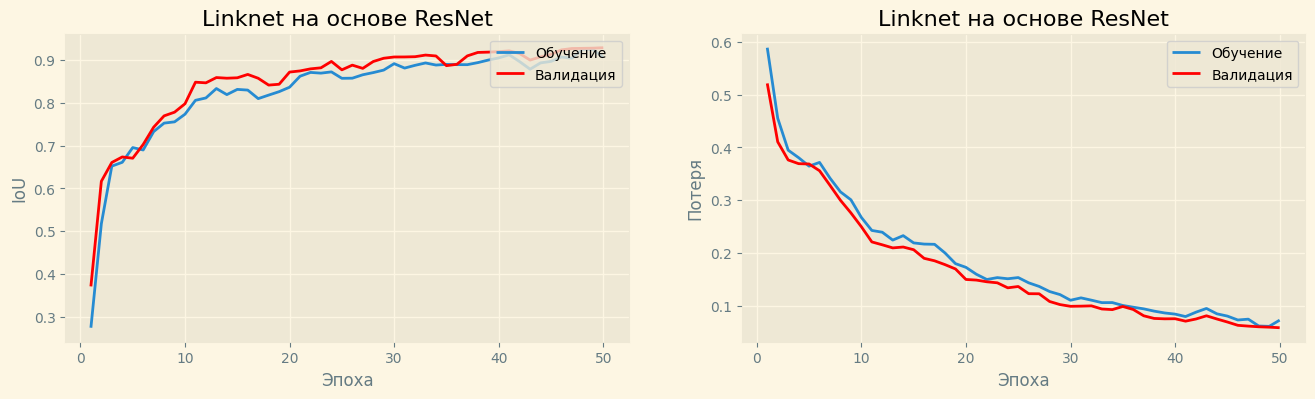

In [67]:
df = pd.read_csv('logs/Linknet/resnet34/version_0/metrics.csv')
Accuracy_train_epoch = df.train_dataset_iou.dropna()[:50]
Accuracy_valid_epoch = df.valid_dataset_iou.dropna()[:50]
Loss_train_epoch = df.Loss_train_epoch.dropna()[:50]
Loss_valid_epoch = df.Loss_valid_epoch.dropna()[:50]

fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(list(range(1,51)), Accuracy_train_epoch, label='Обучение')
axs[0].plot(list(range(1,51)), Accuracy_valid_epoch, label='Валидация', c = 'red')
axs[0].set_xlabel('Эпоха')
axs[0].set_ylabel('IoU')
axs[0].set_title('Linknet на основе ResNet')
axs[0].legend(loc='upper right')
axs[1].plot(list(range(1,51)), Loss_train_epoch, label='Обучение')
axs[1].plot(list(range(1,51)), Loss_valid_epoch, label='Валидация', c = 'red')
axs[1].set_xlabel('Эпоха')
axs[1].set_ylabel('Потеря')
axs[1].set_title('Linknet на основе ResNet')
axs[1].legend(loc='upper right')
plt.savefig('results/Linknet_metrics.jpg')
plt.show()

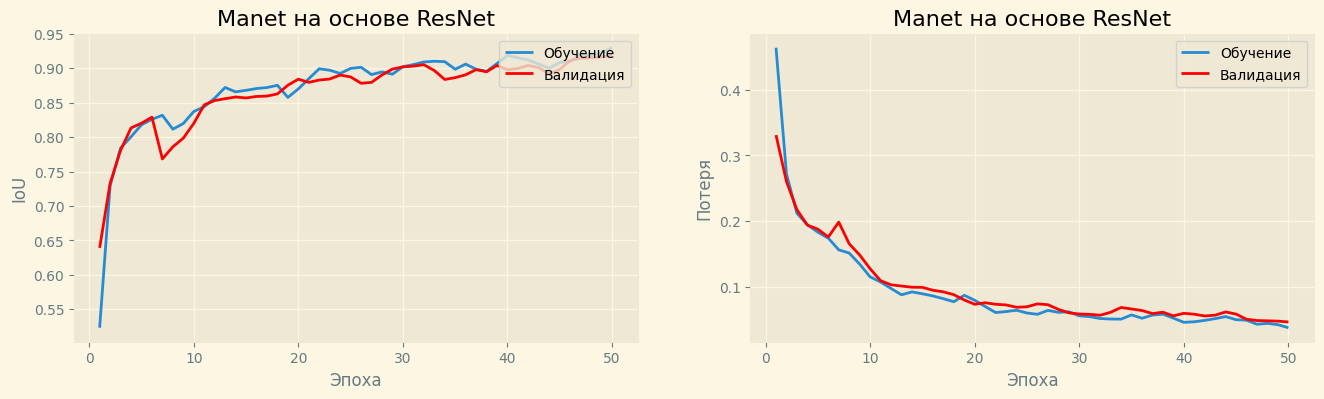

In [69]:
df = pd.read_csv('logs/MAnet/resnet34/version_0/metrics.csv')
Accuracy_train_epoch = df.train_dataset_iou.dropna()[:50]
Accuracy_valid_epoch = df.valid_dataset_iou.dropna()[:50]
Loss_train_epoch = df.Loss_train_epoch.dropna()[:50]
Loss_valid_epoch = df.Loss_valid_epoch.dropna()[:50]

fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(list(range(1,51)), Accuracy_train_epoch, label='Обучение')
axs[0].plot(list(range(1,51)), Accuracy_valid_epoch, label='Валидация', c = 'red')
axs[0].set_xlabel('Эпоха')
axs[0].set_ylabel('IoU')
axs[0].set_title('Manet на основе ResNet')
axs[0].legend(loc='upper right')
axs[1].plot(list(range(1,51)), Loss_train_epoch, label='Обучение')
axs[1].plot(list(range(1,51)), Loss_valid_epoch, label='Валидация', c = 'red')
axs[1].set_xlabel('Эпоха')
axs[1].set_ylabel('Потеря')
axs[1].set_title('Manet на основе ResNet')
axs[1].legend(loc='upper right')
plt.savefig('results/Manet_metrics.jpg')
plt.show()

In [77]:
val_ds = SegData(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, size = 224,  mode = 'test', seed = 1)
batch = next(iter(val_ds))
img, mask = batch
batched_img = np.expand_dims(np.transpose(img, (2, 0, 1)), axis=0)
batched_mask = np.expand_dims(mask, axis=0)

In [71]:
net = UNet() #
model = SegModel(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, net = net)
checkpoint = torch.load('logs/UNet_simple/simple_UNet/version_3/checkpoints/epoch=199-step=9200.ckpt')
model.load_state_dict(checkpoint['state_dict'])
pred = model.net(torch.tensor(batched_img, dtype = torch.float32))
pred[pred > 0.5] = 255
pred[pred <= 0.5] = 0

/home/user/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_590822/3385720084.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models

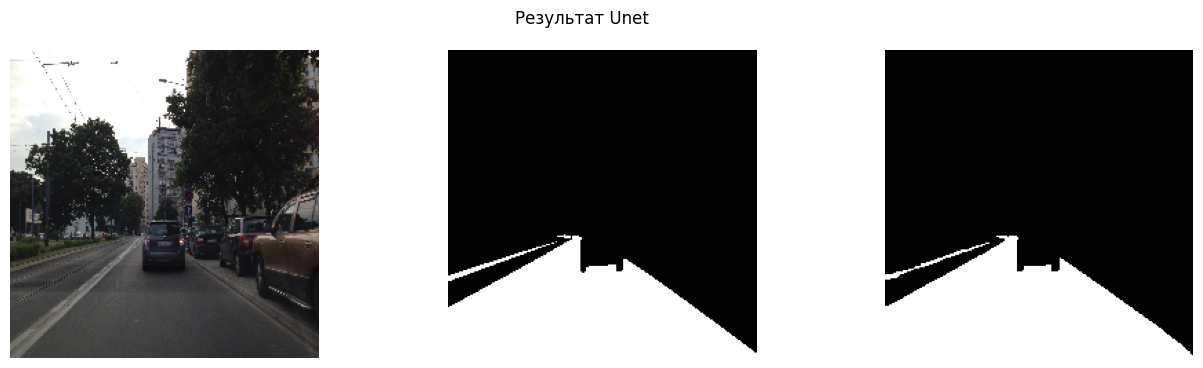

In [43]:
plt.style.use('Solarize_Light2')
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].imshow(img, cmap='binary')
axs[0].axis('off')
axs[1].imshow(batched_mask[0][0], cmap='gray')
axs[1].axis('off') 

axs[2].imshow(pred.squeeze(0).detach().numpy(), cmap='gray')
axs[2].axis('off')
fig.suptitle('Результат Unet')
plt.show()

In [78]:
net = SegNet(1) #
model = SegModel(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, net = net)
checkpoint = torch.load('logs/UNet_simple/checkpoints/check-epoch=00-Loss_valid=1.17-Accuracy_valid=0.19.ckpt')
model.load_state_dict(checkpoint['state_dict'])
pred = model.net(torch.tensor(batched_img, dtype = torch.float32))
pred[pred > 0.5] = 255
pred[pred <= 0.5] = 0

/home/user/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_590822/3690563584.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models

In [256]:
batched_img.shape

(1, 3, 224, 224)

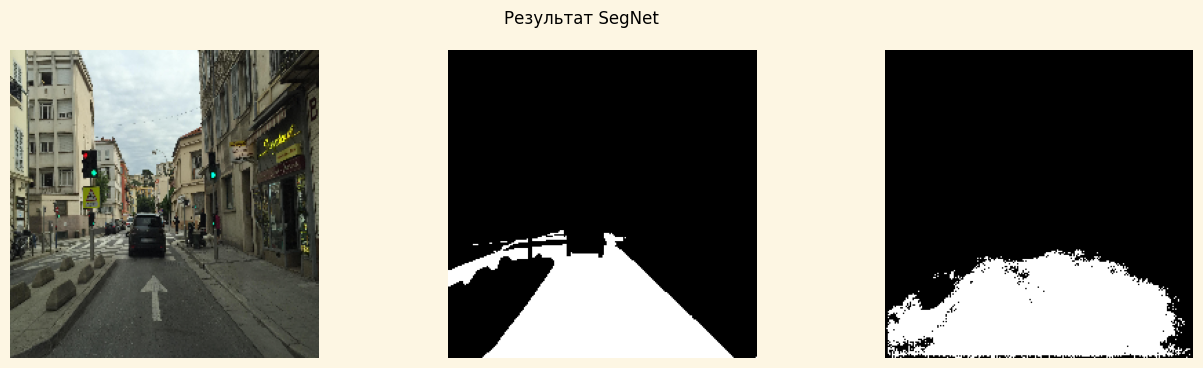

In [79]:
plt.style.use('Solarize_Light2')
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].imshow(img, cmap='binary')
axs[0].axis('off')
axs[1].imshow(batched_mask[0], cmap='gray')
axs[1].axis('off') 

axs[2].imshow(pred.squeeze(0).detach().numpy(), cmap='gray')
axs[2].axis('off')
fig.suptitle('Результат SegNet')
plt.savefig('results/SegNet_pred.jpg')
plt.show()

/tmp/ipykernel_590822/3272515634.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('logs/FPN/resnet34/version_0/checkpoints/epoch=199-step=9200.ck

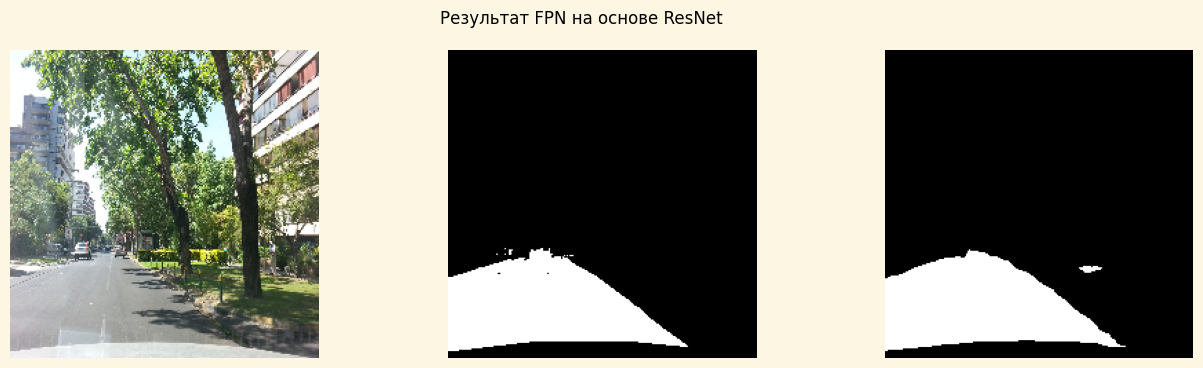

In [80]:
val_ds = PytData(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, size = 224,  mode = 'test', seed = 1)
batch = next(iter(val_ds))
img, mask = batch
batched_img = np.expand_dims(np.transpose(img, (2, 0, 1)), axis=0)
batched_mask = np.expand_dims(mask, axis=0) 

model = PytorchModel(architecture = 'FPN', encoder_name = 'resnet34', in_channels = 3, out_classes = 1,
                     image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                    train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, max_epoch = None)
checkpoint = torch.load('logs/FPN/resnet34/version_0/checkpoints/epoch=199-step=9200.ckpt')
model.load_state_dict(checkpoint['state_dict'])
pred = model(torch.tensor(batched_img, dtype = torch.float32))
pred[pred > 0.5] = 255
pred[pred <= 0.5] = 0

plt.style.use('Solarize_Light2')
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].imshow(img, cmap='binary')
axs[0].axis('off')
axs[1].imshow(batched_mask[0][0], cmap='gray')
axs[1].axis('off') 

axs[2].imshow(pred.squeeze(0).squeeze(0).detach().numpy(), cmap='gray')
axs[2].axis('off')
fig.suptitle('Результат FPN на основе ResNet')
plt.savefig('results/FPN_pred.jpg')
plt.show()

/tmp/ipykernel_590822/2203420795.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('logs/Linknet/resnet34/version_0/checkpoints/epoch=199-step=920

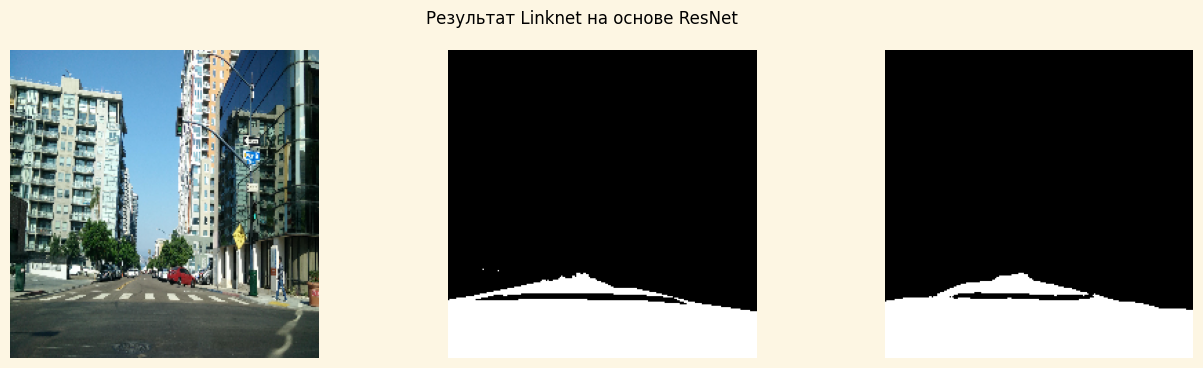

In [81]:
val_ds = PytData(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, size = 224,  mode = 'test', seed = 1)
batch = next(iter(val_ds))
img, mask = batch
batched_img = np.expand_dims(np.transpose(img, (2, 0, 1)), axis=0)
batched_mask = np.expand_dims(mask, axis=0) 

model = PytorchModel(architecture = 'Linknet', encoder_name = 'resnet34', in_channels = 3, out_classes = 1,
                     image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                    train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, max_epoch = None)
checkpoint = torch.load('logs/Linknet/resnet34/version_0/checkpoints/epoch=199-step=9200.ckpt')
model.load_state_dict(checkpoint['state_dict'])
pred = model(torch.tensor(batched_img, dtype = torch.float32))
pred[pred > 0.5] = 255
pred[pred <= 0.5] = 0
plt.style.use('Solarize_Light2')
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].imshow(img, cmap='binary')
axs[0].axis('off')
axs[1].imshow(batched_mask[0][0], cmap='gray')
axs[1].axis('off') 

axs[2].imshow(pred.squeeze(0).squeeze(0).detach().numpy(), cmap='gray')
axs[2].axis('off')
fig.suptitle('Результат Linknet на основе ResNet')
plt.savefig('results/Linknet_pred.jpg')
plt.show()

/tmp/ipykernel_590822/532663189.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('logs/MAnet/resnet34/version_0/checkpoints/epoch=199-step=9200.c

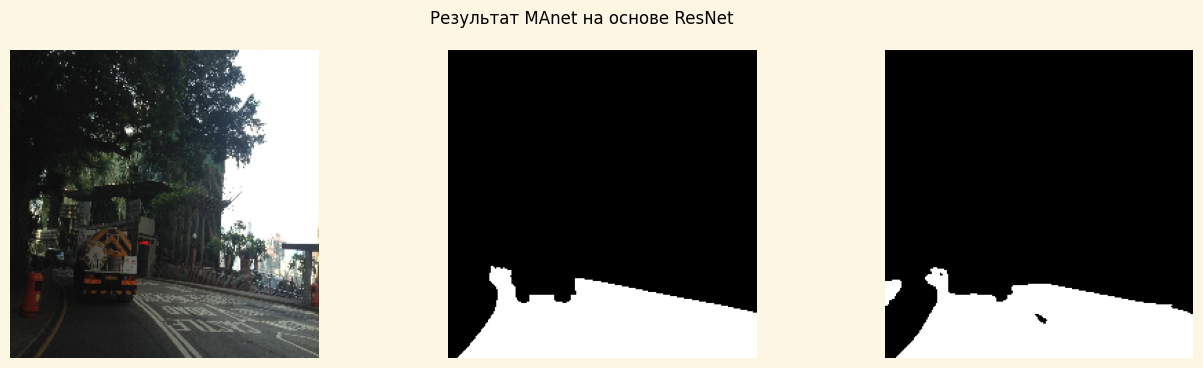

In [83]:
val_ds = PytData(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, size = 224,  mode = 'test', seed = 1)
batch = next(iter(val_ds))
img, mask = batch
batched_img = np.expand_dims(np.transpose(img, (2, 0, 1)), axis=0)
batched_mask = np.expand_dims(mask, axis=0) 

model = PytorchModel(architecture = 'MAnet', encoder_name = 'resnet34', in_channels = 3, out_classes = 1,
                     image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                    train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, max_epoch = None)
checkpoint = torch.load('logs/MAnet/resnet34/version_0/checkpoints/epoch=199-step=9200.ckpt')
model.load_state_dict(checkpoint['state_dict'])
pred = model(torch.tensor(batched_img, dtype = torch.float32))
pred[pred > 0.5] = 255
pred[pred <= 0.5] = 0

plt.style.use('Solarize_Light2')
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].imshow(img, cmap='binary')
axs[0].axis('off')
axs[1].imshow(batched_mask[0][0], cmap='gray')
axs[1].axis('off') 

axs[2].imshow(pred.squeeze(0).squeeze(0).detach().numpy(), cmap='gray')
axs[2].axis('off')
fig.suptitle('Результат MAnet на основе ResNet')
plt.savefig('results/MAnet_pred.jpg')
plt.show()

/tmp/ipykernel_590822/2509989151.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('logs/Unet/resnet34/version_0/checkpoints/epoch=199-step=9200.c

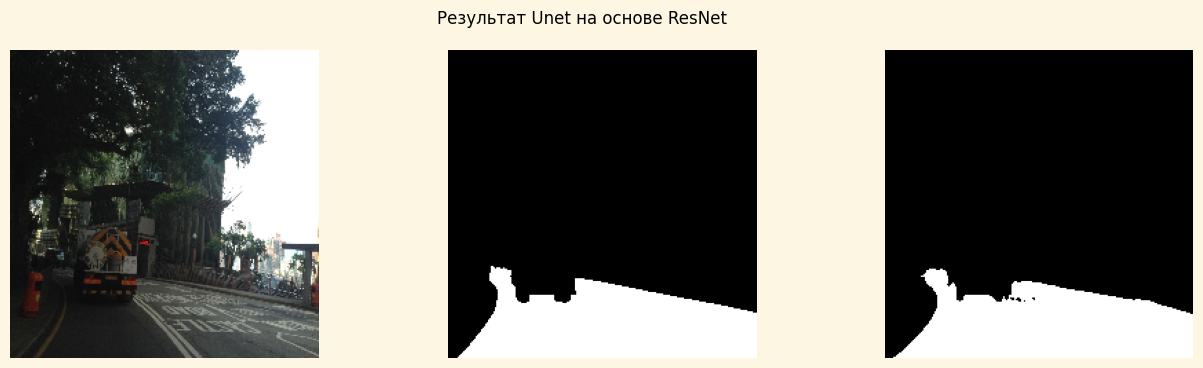

In [85]:
val_ds = PytData(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, size = 224,  mode = 'test', seed = 1)
batch = next(iter(val_ds))
img, mask = batch
batched_img = np.expand_dims(np.transpose(img, (2, 0, 1)), axis=0)
batched_mask = np.expand_dims(mask, axis=0) 

model = PytorchModel(architecture = 'Unet', encoder_name = 'resnet34', in_channels = 3, out_classes = 1,
                     image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                    train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, max_epoch = None)
checkpoint = torch.load('logs/Unet/resnet34/version_0/checkpoints/epoch=199-step=9200.ckpt')
model.load_state_dict(checkpoint['state_dict'])
pred = model(torch.tensor(batched_img, dtype = torch.float32))
pred[pred > 0.5] = 255
pred[pred <= 0.5] = 0

plt.style.use('Solarize_Light2')
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].imshow(img, cmap='binary')
axs[0].axis('off')
axs[1].imshow(batched_mask[0][0], cmap='gray')
axs[1].axis('off') 

axs[2].imshow(pred.squeeze(0).squeeze(0).detach().numpy(), cmap='gray')
axs[2].axis('off')
fig.suptitle('Результат Unet на основе ResNet')
plt.savefig('results/Unet_pred.jpg')
plt.show()

/tmp/ipykernel_590822/2167488733.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('logs/DeepLabV3/resnet34/version_1/checkpoints/epoch=49-step=23

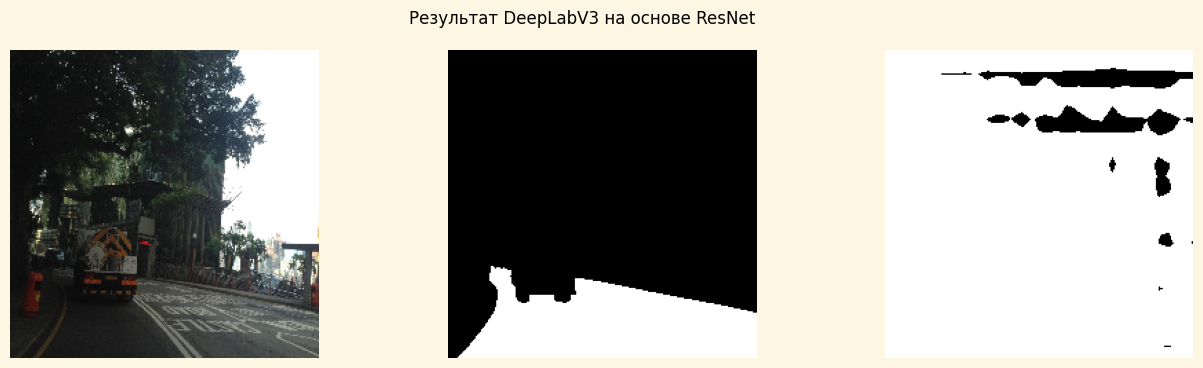

In [106]:
val_ds = PytData(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, size = 224,  mode = 'test', seed = 1)
batch = next(iter(val_ds))
img, mask = batch
batched_img = np.expand_dims(np.transpose(img, (2, 0, 1)), axis=0)
batched_mask = np.expand_dims(mask, axis=0) 

model = PytorchModel(architecture = 'DeepLabV3', encoder_name = 'resnet34', in_channels = 3, out_classes = 1,
                     image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                    train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, max_epoch = None)
checkpoint = torch.load('logs/DeepLabV3/resnet34/version_1/checkpoints/epoch=49-step=2300.ckpt')
model.load_state_dict(checkpoint['state_dict'])
model.eval()
pred = model(torch.tensor(batched_img, dtype = torch.float32))
pred[pred > 0.8] = 255
pred[pred <= 0.8] = 0

plt.style.use('Solarize_Light2')
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].imshow(img, cmap='binary')
axs[0].axis('off')
axs[1].imshow(batched_mask[0][0], cmap='gray')
axs[1].axis('off') 

axs[2].imshow(pred.squeeze(0).squeeze(0).detach().numpy(), cmap='gray')
axs[2].axis('off')
fig.suptitle('Результат DeepLabV3 на основе ResNet')
plt.savefig('results/DeepLabV3_pred.jpg')
plt.show()

In [86]:
val_ds = PytData(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, size = 224,  mode = 'test', seed = 1)
batch = next(iter(val_ds))
img, mask = batch
batched_img = np.expand_dims(np.transpose(img, (2, 0, 1)), axis=0)
batched_mask = np.expand_dims(mask, axis=0) 

In [87]:
import os
import time
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [289]:
model_names = os.listdir('logs')
models_time = {}
for model_name in model_names:
    if model_name == 'UNet_simple':
        continue
    if model_name == 'SegNet':
        encoder = 'vgg11' 
        net = SegNet(1) #
        model = SegModel(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                        train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, net = net)
    else:
        encoder = 'resnet34'
        model = PytorchModel(architecture = model_name, encoder_name = encoder, in_channels = 3, out_classes = 1,
                        image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                        train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, max_epoch = None)
        
    models_time[model_name] = []    
    checkpoint = torch.load(f'logs/{model_name}/{encoder}/version_0/checkpoints/epoch=199-step=9200.ckpt')
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    img = torch.tensor(batched_img, dtype = torch.float32)
    
    for i in range(50):
        start = time.time()
        with torch.no_grad():
            if model_name == 'SegNet':
                _ = model.net(img)
            else:
                _ = model(img)
        end = time.time() - start
        models_time[model_name].append(end)

/tmp/ipykernel_590822/4036324542.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f'logs/{model_name}/{encoder}/version_0/checkpoints/epoch=199-s

KeyboardInterrupt: 

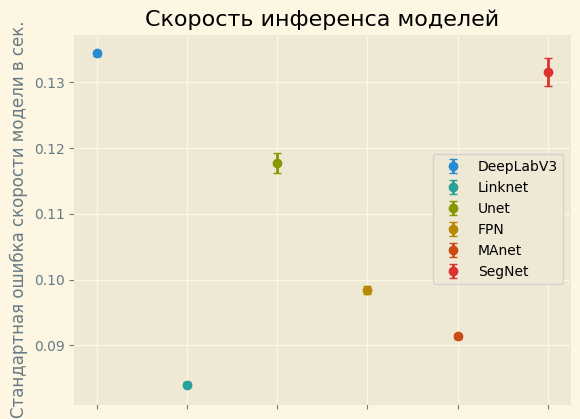

In [89]:
# построение errorbar
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(1, 1)
for i, model_name in enumerate(models_time):
    data = models_time[model_name]
    stderr = stats.sem(data)  
    ax.errorbar(x = i+1, y = np.mean(data) , yerr=stderr, fmt='o', capsize=3, label = model_name )
    ax.set_label(model_name)
    ax.set_xticklabels([])
    plt.ylabel('Стандартная ошибка cкорости модели в сек.')
    plt.title('Скорость инференса моделей')
    
plt.legend(fontsize = 10)
plt.savefig('results/models_speed.jpg')
plt.show()

In [299]:
import cv2
from PIL import Image, ImageDraw
def get_prediction(image_numpy, model_name, checkpoint_path = f'logs/Linknet/resnet34/version_0/checkpoints/epoch=199-step=9200.ckpt'):
    if model_name == 'SegNet':
        net = SegNet(1) #
        model = SegModel(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, net = net)
        checkpoint = torch.load('logs/SegNet/vgg11/version_0/checkpoints/epoch=199-step=9200.ckpt')
        state_dict = checkpoint['state_dict'] 
        model.load_state_dict(state_dict) 
    else:
        checkpoint_path = f'logs/{model_name}/resnet34/version_0/checkpoints/epoch=199-step=9200.ckpt' 
        model = PytorchModel(architecture = model_name, encoder_name = 'resnet34', in_channels = 3, out_classes = 1,
                                image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                                train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, max_epoch = None)
        checkpoint = torch.load(checkpoint_path) 
        state_dict = checkpoint['state_dict'] 
        model.load_state_dict(state_dict) 
    if model_name == 'DeepLabV3':
        model.eval()  
    tensor_img = torch.tensor(image_numpy) 
    with torch.no_grad():
        if model_name == 'SegNet': 
            output = model.net(tensor_img.unsqueeze(0).to(torch.float32)).unsqueeze(0) 
        else:
            output = model(tensor_img) 
    output[output < 0.5] = 0
    output[output >= 0.5] = 1
    
    return output

def get_coordinates(mask):
    indices = list(np.argwhere(mask == 1))
    indices_up_down = sorted(indices, key = lambda x: (x[0], x[1]))
    indices_left_right = sorted(indices, key = lambda x: (x[1], -x[0]))
    indices_left_right_rb = sorted(indices, key = lambda x: (x[1], x[0]))

    upper_indices = indices_up_down[:130]
    upper_indices = sorted(upper_indices, key = lambda x: (x[1], x[0]))

    upper_left, upper_right = upper_indices[0], upper_indices[-1]
    bottom_left, bottom_right = indices_left_right[0], indices_left_right_rb[-1]
    
    return [*upper_left], [*upper_right], [*bottom_left], [*bottom_right]

def perspective_transf(image_path, model_name, return_coords = False, img_h = 224, img_w = 224):
    img = cv2.imread(image_path)
    img_original = cv2.resize(img, (img_w, img_h))
    img_original = np.transpose(img_original, (2, 0, 1)) 

    mask = get_prediction(img_original, model_name).detach().numpy() #получение сегментированной маски дороги 
    tl, tr, bl, br  = get_coordinates(mask[0][0]) # получение координат трапеции вокруг сегментированной маски
    tl = np.array([x.item() for x in tl[:2]])
    tr = np.array([x.item() for x in tr[:2]])
    bl = np.array([x.item() for x in bl[:2]])
    br = np.array([x.item() for x in br[:2]])
    img_to_draw = img_original.transpose((1, 2, 0))
    
    pts1 = np.float32([tl[::-1], bl[::-1], tr[::-1], br[::-1]])
    pts2 = np.float32([[0,0], [0, 224], [img_w, 0],  [img_h, img_w]])
    
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    transformed_frame = cv2.warpPerspective(img_to_draw, matrix, (img_h, img_w))
    
    if return_coords:
        return transformed_frame, mask[0][0], tl, bl, tr, br
    return transformed_frame #numpy array

/tmp/ipykernel_590822/3000582060.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)
/home/user/.local/lib/python3.9/site-packages/

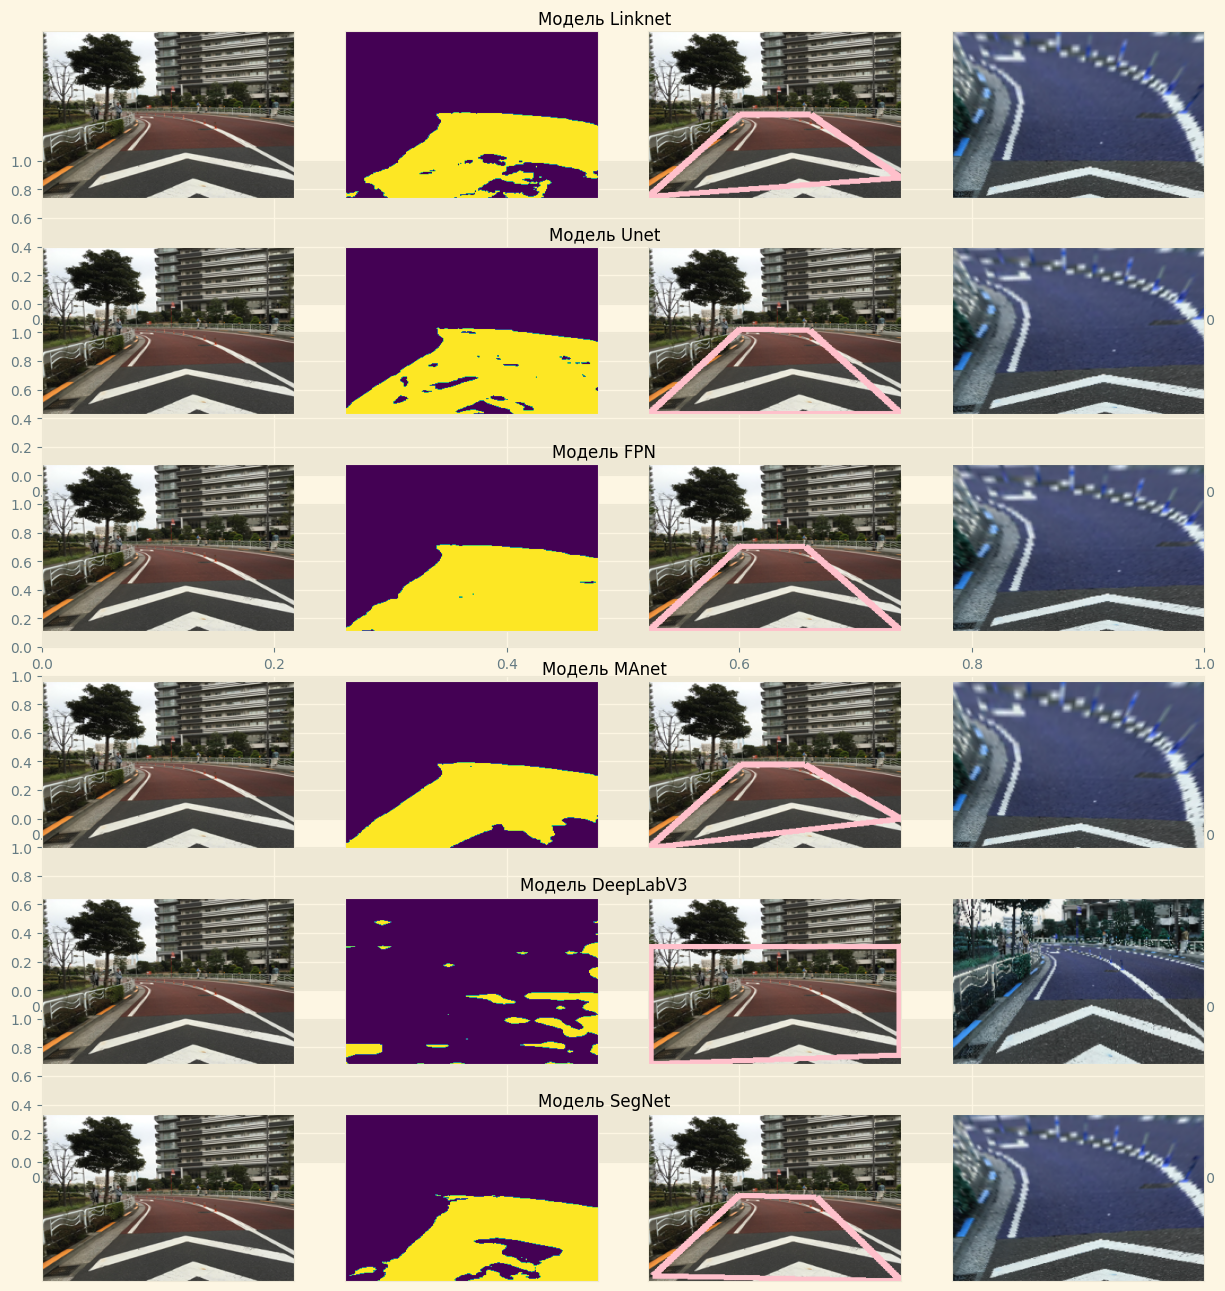

In [301]:
model_names = [  'Linknet', 'Unet', 'FPN', 'MAnet','DeepLabV3', 'SegNet']
img_original = Image.open(r'../seg_dataset/images/--jRsD9anHdGxv4ZOCQktA.jpg').resize((224, 224)) 
fig, ax = plt.subplots(len(model_names), 1, figsize = (15, 13))
#fig.suptitle('Трансформация перспектив для разных сегментаций')
gridspec = ax[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]
plt.style.use('Solarize_Light2')
for i, subfig in enumerate(subfigs):
    model_name = model_names[i]
    subfig.suptitle(f'Модель {model_name}') 
    axs = subfig.subplots(nrows=1, ncols=4) 
    
    transformed_frame,mask,  tl, bl, tr, br = perspective_transf(r'../seg_dataset/images/--jRsD9anHdGxv4ZOCQktA.jpg', model_name = model_name, return_coords = True) 
    img = Image.fromarray(transformed_frame)
    tmp = Image.open(r'../seg_dataset/images/--jRsD9anHdGxv4ZOCQktA.jpg').resize((224, 224))
    draw = ImageDraw.Draw(tmp)
    draw.line((*tl[::-1], *tr[::-1]), fill='pink', width=8)
    draw.line((*tl[::-1], *bl[::-1]), fill='pink', width=8)
    draw.line((*bl[::-1], *br[::-1]), fill='pink', width=8)
    draw.line((*tr[::-1], *br[::-1]), fill='pink', width=8)
    pictures = [img_original, mask, tmp, transformed_frame]
    for j in range(4):
        axs[j].imshow(pictures[j], aspect = 'auto')
        axs[j].grid(False) 
        axs[j].set_yticks([])
        axs[j].set_xticks([])
plt.show()